## **Fashion MNIST Classification with Convolutional Neural Networks**

### Introduction

Welcome to this notebook where we delve into the fascinating world of fashion classification using Convolutional Neural Networks (CNNs). In the realm of computer vision, the Fashion MNIST dataset serves as a benchmark for evaluating and honing the capabilities of image classification models.

Fashion MNIST, a more challenging alternative to the traditional handwritten digit MNIST dataset, comprises 70,000 grayscale images of 10 different fashion categories. Each image is a 28x28 pixel representation of various clothing items, such as shoes, shirts, and trousers.

In this notebook, we will explore the process of building and training a CNN to accurately classify these fashion items. CNNs have proven to be exceptionally effective in image recognition tasks, making them a natural choice for this endeavor.

**Import all required libraries**

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
print('import successfully!')

import successfully!


### Load Fashion MNIST Training and Testing Datasets

In this section, we load the Fashion MNIST dataset for training and testing our Convolutional Neural Network (CNN). The dataset consists of 60,000 training images and 10,000 testing images, each belonging to one of the 10 fashion categories. The `tf.keras.datasets.fashion_mnist.load_data()` function is employed to retrieve the data, and it is split into training and testing sets, represented by `(x_train, y_train)` and `(x_test, y_test)`, respectively.

- `x_train`: Training images
- `y_train`: Corresponding labels for training images
- `x_test`: Testing images
- `y_test`: Corresponding labels for testing images

These datasets will serve as the foundation for training and evaluating the performance of our CNN on the task of fashion item classification.


In [42]:
# Load Fashion MNIST training and testing datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

### Display Shapes of Loaded Datasets

Here, we print the shapes of the loaded datasets to gain insights into the dimensions of our training and testing data:

- `x_train`: Shape of the training images dataset.
- `y_train`: Shape of the corresponding labels for the training images.
- `x_test`: Shape of the testing images dataset.
- `y_test`: Shape of the corresponding labels for the testing images.

Understanding these shapes is crucial for setting up and validating our Convolutional Neural Network (CNN) architecture, ensuring compatibility between the model and the input data.


In [57]:
# Display the shapes of the loaded datasets
print('Shape of the x_train:', x_train.shape)
print('Shape of the y_train:', y_train.shape)
print('Shape of the x_test:', x_test.shape)
print('Shape of the y_test:', y_test.shape)

Shape of the x_train: (60000, 28, 28, 1)
Shape of the y_train: (60000,)
Shape of the x_test: (10000, 28, 28, 1)
Shape of the y_test: (10000,)


### Display Sample Image from Training Dataset

In this section, we visualize a sample image from the training dataset using `plt.matshow()`. This function displays the pixel values of the image in a matrix-like format, providing a visual representation of the first image in the training dataset (`x_train[0]`). This serves as an initial exploration of the dataset, allowing us to inspect the characteristics of the images and gain insights into the underlying patterns that our Convolutional Neural Network (CNN) will learn.


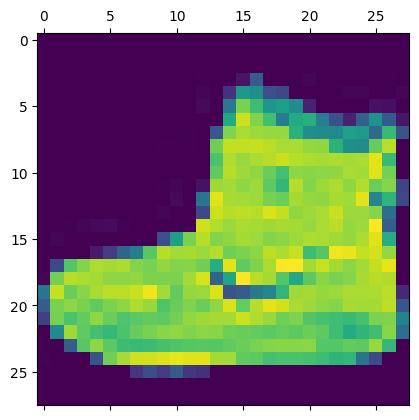

In [58]:
# Display a sample image from the training dataset
plt.matshow(x_train[0])

### Class Labels

To enhance the interpretability of our model's predictions, we define class labels corresponding to the 10 fashion categories present in the Fashion MNIST dataset. These labels will be used to map the numerical predictions from our model to their respective clothing item categories.

- 'T-shirt/top'
- 'Trouser'
- 'Pullover'
- 'Dress'
- 'Coat'
- 'Sandal'
- 'Shirt'
- 'Sneaker'
- 'Bag'
- 'Ankle boot'


In [59]:
# Define class labels for better interpretation of results
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Display One Image from Each Category in Fashion MNIST

In this section, we define a function, `display_images_from_each_category()`, to showcase one representative image from each of the 10 fashion categories in the Fashion MNIST dataset. The function utilizes matplotlib to create a 2x5 grid, with each subplot displaying an image along with its corresponding category label. This visual exploration provides a glimpse into the diverse clothing items present in the dataset, aiding in our understanding of the types of images our Convolutional Neural Network (CNN) will learn to classify.

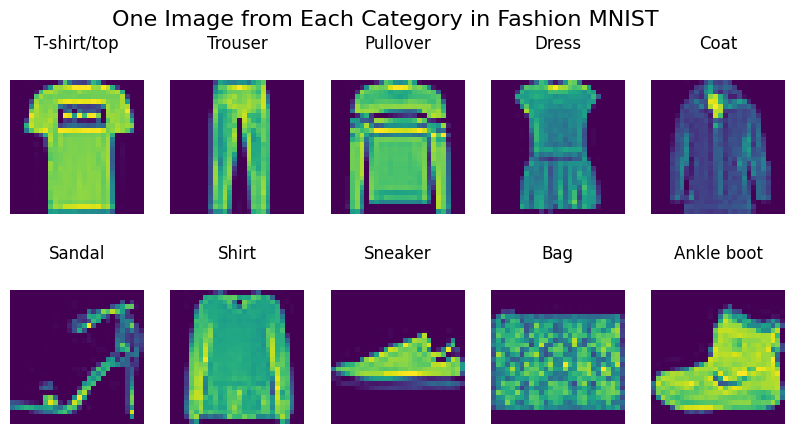

In [60]:
# Function to display one image from each category in Fashion MNIST
def display_images_from_each_category():
    # Create a dictionary to store one image for each category
    images_by_category = {label: None for label in class_labels}

    # Find one image for each category
    for label in range(len(class_labels)):
        index = next((i for i, value in enumerate(y_train) if value == label), None)
        if index is not None:
            images_by_category[class_labels[label]] = x_train[index]

    # Display one image for each category using matplotlib
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    fig.suptitle("One Image from Each Category in Fashion MNIST", fontsize=16)

    for ax, (label, image) in zip(axes.flatten(), images_by_category.items()):
        ax.matshow(image)
        ax.set_title(label)
        ax.axis('off')

    plt.show()

# Call the function to display images from each category
display_images_from_each_category()

### Normalize Pixel Values

To facilitate the training process of our Convolutional Neural Network (CNN), we normalize the pixel values of the training and testing images. The normalization is performed by dividing each pixel value by 255.0, ensuring that the pixel intensities range from 0 to 1. This step is crucial for standardizing the input data and enhancing the convergence and performance of the model during training.


In [61]:
# Normalize pixel values of training and testing images to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

### Check Pixel Values After Scaling

In this section, we verify the pixel values of the first image in the training dataset (`x_train[0]`) after scaling. The pixel values should now fall within the range of 0 to 1 due to the normalization process. This check ensures that the scaling operation has been successfully applied to the entire dataset, aligning with the desired input format for our Convolutional Neural Network (CNN).

In [ ]:
# Check pixel values after scaling (should be between 0 and 1)
x_train[0]

### Add Channel Dimension to Images

To meet the input requirements of our Convolutional Neural Network (CNN), we reshape the training and testing images by adding a channel dimension. The reshaping is done using the `reshape` function, ensuring that each image has the shape (28, 28, 1). This step is essential for compatibility with the convolutional layers of the CNN, which expect input images in a 3D format with height, width, and channel dimensions.


In [50]:
# Add channel dimension to the images as required
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

### Define Convolutional Neural Network (CNN) Model

We define our Convolutional Neural Network (CNN) model using the Sequential API provided by TensorFlow's Keras. The model comprises a series of convolutional layers, max-pooling layers, and densely connected layers. Here is a brief overview of the model architecture:

1. Convolutional Layer (32 filters, 3x3 kernel, ReLU activation)
2. MaxPooling Layer (2x2 pool size)
3. Convolutional Layer (64 filters, 3x3 kernel, ReLU activation)
4. MaxPooling Layer (2x2 pool size)
5. Convolutional Layer (120 filters, 3x3 kernel, ReLU activation)
6. MaxPooling Layer (2x2 pool size)
7. Flatten Layer
8. Dense Layer (64 units, ReLU activation)
9. Dense Layer (10 units, Softmax activation)

This architecture is designed to learn hierarchical features from the Fashion MNIST dataset, leading to effective classification of clothing items into their respective categories.


In [63]:
# Define the CNN model using Sequential API
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(120, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

### Compile Convolutional Neural Network (CNN) Model

Before training the model, we compile it using the `compile` method. The compilation involves specifying the optimizer, loss function, and evaluation metric(s). In this case:

- **Optimizer:** Adam optimizer, a popular choice for training deep neural networks.
- **Loss Function:** Sparse categorical crossentropy, suitable for multi-class classification problems with integer labels.
- **Metrics:** Accuracy, providing insight into the model's performance during training and evaluation.

This step prepares the model for training by configuring its learning process.


In [64]:
# Compile the CNN model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train Convolutional Neural Network (CNN) Model

We initiate the training of our CNN model using the `fit` method. The training process involves providing the training images (`x_train`) and corresponding labels (`y_train`). Additionally, we specify the batch size (200), the number of epochs (42), and the validation data to assess the model's performance on the testing dataset (`x_test`, `y_test`).

- **Batch Size:** 200, indicating the number of samples processed in each iteration during training.
- **Epochs:** 42, representing the number of times the entire training dataset is passed through the model.
- **Validation Data:** Evaluation of the model's performance on the testing dataset during training.

This step iteratively adjusts the model's parameters to optimize its ability to classify fashion items accurately.


In [65]:
# Train the CNN model
model.fit(x_train, y_train, batch_size=200, epochs=42, validation_data=(x_test, y_test))

Epoch 1/42
300/300 [==============================] - 4s 8ms/step - loss: 1.4697 - accuracy: 0.4541 - val_loss: 0.9827 - val_accuracy: 0.6282
Epoch 2/42
300/300 [==============================] - 2s 6ms/step - loss: 0.9001 - accuracy: 0.6661 - val_loss: 0.8621 - val_accuracy: 0.6774
Epoch 3/42
300/300 [==============================] - 2s 6ms/step - loss: 0.8047 - accuracy: 0.6964 - val_loss: 0.8150 - val_accuracy: 0.6914
Epoch 4/42
300/300 [==============================] - 2s 6ms/step - loss: 0.7610 - accuracy: 0.7140 - val_loss: 0.7549 - val_accuracy: 0.7128
Epoch 5/42
300/300 [==============================] - 2s 6ms/step - loss: 0.7221 - accuracy: 0.7298 - val_loss: 0.7255 - val_accuracy: 0.7314
Epoch 6/42
300/300 [==============================] - 2s 6ms/step - loss: 0.6852 - accuracy: 0.7442 - val_loss: 0.6869 - val_accuracy: 0.7483
Epoch 7/42
300/300 [==============================] - 2s 5ms/step - loss: 0.6507 - accuracy: 0.7589 - val_loss: 0.6695 - val_accuracy: 0.7498
Epoch 

### Evaluate Convolutional Neural Network (CNN) Model

We assess the performance of our trained CNN model on the testing dataset using the `evaluate` method. The model is evaluated in terms of its loss and accuracy on the unseen data. The obtained test accuracy is then printed for a quantitative measure of the model's classification performance on the Fashion MNIST testing dataset.


In [55]:
# Evaluate the CNN model on the testing dataset
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'The test accuracy is: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.5365 - accuracy: 0.8910
The test accuracy is: 0.890999972820282


### Save Trained Convolutional Neural Network (CNN) Model

After training, we save the trained CNN model to a file named 'fashion_mnist_trained.h5'. This enables us to reuse the model for future predictions or further analysis without the need to retrain it. Saving the model in this way preserves its architecture, weights, and configuration.


In [67]:
# Save the trained Convolutional Neural Network (CNN) model
# model.save('fashion_mnist_trained.h5')

## **Hope this Notebook is helpful. Upvote if you Like it.**